# Library and data import

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("heart_indicators_clean.csv") 

# Data Engineering

In [ ]:
#drop_these = ['Fruits','Veggies','CholCheck','BMI','PhysActivity','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','Sex','Education']
df_imp = df.copy()
#for label in drop_these:
#  df_imp = df_imp.drop(label, axis=1)

In [ ]:
df_imp.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# ANN Model Training

In [ ]:
import tensorflow as tf
from tensorflow import keras as keras

print(tf.__version__)

METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
]

def createModel(dim=21):
  model = Sequential()
  #output_bias = tf.keras.initializers.Constant(-2.26356726)
  #model.add(Dense(32, input_dim=dim, activation='relu'))
  #model.add(Dense(16, input_dim=16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

  return model

2.8.0


In [ ]:
x = len(df['HeartDiseaseorAttack'])
y = len(df[df['HeartDiseaseorAttack'] == 1])
print(y/x)

print(len(df['HeartDiseaseorAttack']))
print(len(df[df['HeartDiseaseorAttack'] == 1]))

0.09418558814254178
253680
23893


In [ ]:

np.log([23893/(253680-23893)])

array([-2.26356726])

In [ ]:
def evaluateModel(model, df, epochs=5):
  train, test = train_test_split(df, test_size=0.1)
  Y = train['HeartDiseaseorAttack']
  X = train.drop('HeartDiseaseorAttack', axis=1)

  Y_test = test['HeartDiseaseorAttack']
  X_test = test.drop('HeartDiseaseorAttack', axis=1)

  history = model.fit(X, Y, epochs=epochs, batch_size=5)
  evaluation = model.evaluate(X_test, Y_test)

  acc = {'train':history.history["accuracy"][-1],
         'test':evaluation[1],
         }

  return acc


In [ ]:
model = createModel(len(df_imp.columns)-1)

In [ ]:
#train, test = train_test_split(df_imp, test_size=0.1)
#Y = train['HeartDiseaseorAttack']
#X = train.drop('HeartDiseaseorAttack', axis=1)

#Y_test = test['HeartDiseaseorAttack']
#X_test = test.drop('HeartDiseaseorAttack', axis=1)

Y = df_imp['HeartDiseaseorAttack']
X = df_imp.drop('HeartDiseaseorAttack', axis=1)

history = model.fit(X, Y, epochs=1, batch_size=5,validation_split = 0.1)
#evaluation = model.evaluate(X_test, Y_test)

45663/45663 [==============================] - 81s 2ms/step - loss: 0.2394 - accuracy: 0.9077 - precision: 0.5347 - recall: 0.1250 - val_loss: 0.2500 - val_accuracy: 0.9020 - val_precision: 0.4919 - val_recall: 0.1593


In [ ]:
print(history.history['val_accuracy'])

[0.902790904045105, 0.9036975502967834, 0.9032639265060425, 0.904446542263031, 0.9025937914848328]


In [ ]:
train, test = train_test_split(df_imp, test_size=0.1)
Y_test = test['HeartDiseaseorAttack']
X_test = test.drop('HeartDiseaseorAttack', axis=1)
Y_pred = model.predict(X_test)

In [ ]:
import numpy as np
Y_pred_r = np.rint(Y_pred)

print(Y_pred_r)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred_r)


array([[22699,   264],
       [ 2061,   344]])

In [ ]:
print(len(Y_pred_r))

25368


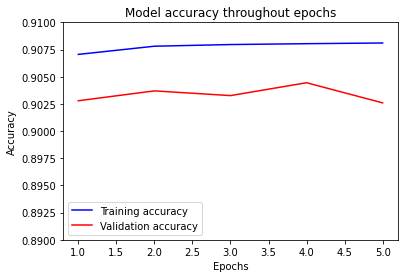

In [ ]:
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
x = [1,2,3,4,5]
plt.plot(x, acc, color='b',label='Training accuracy')
plt.plot(x,val_acc, color='r', label='Validation accuracy')
plt.title('Model accuracy throughout epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.89,0.91])
plt.legend()
plt.show()

In [ ]:
model = createModel(len(df_imp.columns)-1)
accs = []

K_CROSS_VALIDATION = 1

for i in range(K_CROSS_VALIDATION):
  results = evaluateModel(model, df_imp)
  accs.append(results)


In [ ]:
sum = 0
for i in accs:
  sum += i['test']

acc = round((sum*100)/len(accs),2)

print('Acccuracy: ' + str(acc))

In [ ]:
plot_cm(test_labels, test_predictions_resampled)